In [1]:
import numpy as np

In [2]:
import tensorflow as tf
import sklearn

In [3]:
import pickle
train_x,train_y = pickle.load(open('datauint8.pkl','rb'))

In [4]:
len(train_x),len(train_y)

(10000, 10000)

In [5]:
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y = train_test_split(train_x,train_y,test_size=0.2,random_state=1120)

In [6]:
# do not use this now, will cause future shuffle slow
train_x = np.asarray(train_x,dtype=np.uint8)
test_x = np.asarray(test_x,dtype=np.uint8)

In [10]:
len(train_x),len(train_y),test_x.shape,len(test_y)

(8000, 8000, (2000, 612060), 2000)

In [11]:
import pickle
#pickle.dump((train_x,train_y),open('data.pkl','wb'))

In [12]:
import sys
sys.getsizeof(train_x[0]) * 10000

960000

In [13]:
len(train_x),test_x.shape

(8000, (2000, 612060))

In [7]:
train_y = [1 if i >= 20 else 0 for i in train_y  ]

In [8]:
test_y = [1 if i >= 20 else 0 for i in test_y  ]

# Logistic regression to split data as >= 20 and < 20

In [ ]:
# TODO use 100% data ,not 80% now
# iter 3000 test auc 0.71 still improving

weights_dic = {}

from sklearn.utils import shuffle
feed_size = 100
n_input = 101 * 101 * 60
X = tf.placeholder(tf.uint8,[None,n_input])
W = tf.Variable(tf.zeros([n_input,1]),tf.float32)
b = tf.Variable([0.0],tf.float32)
y = tf.sigmoid(tf.add(tf.matmul(tf.to_float(X),W),b))
y_ = tf.placeholder(tf.float32)
resm = tf.reduce_sum(tf.pow(tf.transpose(y) - y_,2))

val_train_size = 1000


debug_var = tf.log(tf.transpose(y))

max_ent =  - tf.reduce_sum(
    tf.reduce_sum(tf.multiply(y_,tf.log(tf.transpose(y))))
    + tf.reduce_sum(tf.multiply((1 - y_),tf.log(1 - tf.transpose(y))))
) 
#accuracy = 
#auc = tf.contrib.metrics.streaming_auc(, b)
#auc = tf.contrib.metrics.streaming_auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))
auc = tf.metrics.auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))


train_step = tf.train.AdamOptimizer(0.0000003).minimize(max_ent)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
sess.run(tf.initialize_local_variables())

for i in range(4000):
    indexbegin = feed_size * i % len(train_y)
    #indexbegin = 0
    if i % (len(train_y) / (feed_size)) == 0:
        print("shuffleing ...")
        train_x,train_y = shuffle(train_x,train_y)
    batch_xs,batch_ys = np.asarray(train_x[indexbegin:indexbegin + feed_size],dtype=np.uint8),train_y[indexbegin:indexbegin + feed_size]
    if i % (len(train_y) / (feed_size * 2)) == 0:
        print('itertion %s' % (i),end=' ')
        curr_loss = sess.run(max_ent,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        print (curr_loss,end=" ")
        sysauc = sess.run(auc,feed_dict={X:test_x,y_:test_y})
        print (sysauc)
        #dv = sess.run(debug_var,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        #print (dv)
        #print ("train loss: %s" % (curr_loss),end=' ')
        #curr_loss = sess.run(real_resm,feed_dict={X:test_x,y_:test_y})
        #print ("test loss: %s" % (curr_loss),end=" ")
        #print(" check weights_dic[%s]" % (i),end=" ")
        #yy = sess.run(y,feed_dict={X:test_x})
        #print (yy[:2,0],end=" ")
        #debug_val = sess.run(debug_var,feed_dict={X:test_x,y_:test_y})
        weights_dic[i] = (sess.run(W),sess.run(b))
        #print("b: %s" % (weights_dic[i][1]))
    sess.run(train_step,feed_dict={X:batch_xs,y_:batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Instructions for updating:
Use `tf.local_variables_initializer` instead.
shuffleing ...
itertion 0 693.146 (0.0, 0.5)
itertion 40 656.117 (0.5, 0.55959266)
shuffleing ...
itertion 80 586.144 (0.55959266, 0.61323798)
itertion 120 551.246 (0.61323798, 0.63766861)
shuffleing ...
itertion 160 576.606 (0.63766861, 0.64245129)
itertion 200 638.061 (0.64245129, 0.64118272)
shuffleing ...
itertion 240 544.944 (0.64118272, 0.65306818)
itertion 280 563.815 (0.65306818, 0.65521824)
shuffleing ...
itertion 320 598.007 (0.65521824, 0.65608406)
itertion 360 465.461 (0.65608406, 0.66346192)
shuffleing ...
itertion 400 494.872 (0.66346192, 0.66928351)
itertion 440 553.856 (0.66928351, 0.6676082)
shuffleing ...
itertion 480 481.567 (0.6676082, 0.67257905)
itertion 520 466.14 (0.67257905, 0.67638451)
shuffleing ...
itertion 560 509.345 (0.67638451, 0.67667329)
itertion 600 439.857 (0.67667329, 0.68019283)
shuffleing ...
itertion 6

# tensorflow's linear regression

In [ ]:
tf.contrib.learn.LogisticRegressor

# Logistic regression with L2 regulation

In [32]:
# TODO use 100% data ,not 80% now
# iter 3000 test auc 0.71 still improving

weights_dic = {}

from sklearn.utils import shuffle
feed_size = 100
n_input = 101 * 101 * 60
X = tf.placeholder(tf.uint8,[None,n_input])
W = tf.Variable(tf.zeros([n_input,1]),tf.float32)
b = tf.Variable([0.0],tf.float32)
y = tf.sigmoid(tf.add(tf.matmul(tf.to_float(X),W),b))
y_ = tf.placeholder(tf.float32)
C = 1.0
resm = tf.reduce_sum(tf.pow(tf.transpose(y) - y_,2))

val_train_size = 1000


debug_var = tf.log(tf.transpose(y))

max_ent =  - C * tf.reduce_sum(
    tf.reduce_sum(tf.multiply(y_,tf.log(tf.transpose(y))))
    + tf.reduce_sum(tf.multiply((1 - y_),tf.log(1 - tf.transpose(y))))
) + tf.reduce_sum(tf.square(W)) / 2
#accuracy = 
#auc = tf.contrib.metrics.streaming_auc(, b)
#auc = tf.contrib.metrics.streaming_auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))
auc = tf.metrics.auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))


train_step = tf.train.AdamOptimizer(0.0000003).minimize(max_ent)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
sess.run(tf.initialize_local_variables())

for i in range(4000):
    indexbegin = feed_size * i % len(train_y)
    #indexbegin = 0
    if i % (len(train_y) / (feed_size)) == 0:
        print("shuffleing ...")
        train_x,train_y = shuffle(train_x,train_y)
    batch_xs,batch_ys = np.asarray(train_x[indexbegin:indexbegin + feed_size],dtype=np.uint8),train_y[indexbegin:indexbegin + feed_size]
    if i % (len(train_y) / (feed_size * 2)) == 0:
        print('itertion %s' % (i),end=' ')
        curr_loss = sess.run(max_ent,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        print (curr_loss,end=" ")
        sysauc = sess.run(auc,feed_dict={X:test_x,y_:test_y})
        print (sysauc)
        pw = sess.run(W)
        print pw
        #dv = sess.run(debug_var,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        #print (dv)
        #print ("train loss: %s" % (curr_loss),end=' ')
        #curr_loss = sess.run(real_resm,feed_dict={X:test_x,y_:test_y})
        #print ("test loss: %s" % (curr_loss),end=" ")
        #print(" check weights_dic[%s]" % (i),end=" ")
        #yy = sess.run(y,feed_dict={X:test_x})
        #print (yy[:2,0],end=" ")
        #debug_val = sess.run(debug_var,feed_dict={X:test_x,y_:test_y})
        weights_dic[i] = (sess.run(W),sess.run(b))
        #print("b: %s" % (weights_dic[i][1]))
    sess.run(train_step,feed_dict={X:batch_xs,y_:batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Instructions for updating:
Use `tf.local_variables_initializer` instead.
shuffleing ...
itertion 0 693.146 (0.0, 0.5)
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
itertion 40 677.817 (0.5, 0.59133518)
[[  3.70351472e-07]
 [  4.14065170e-07]
 [  2.94666080e-07]
 ..., 
 [ -4.44581161e-07]
 [ -4.26739888e-07]
 [ -5.02523903e-07]]


KeyboardInterrupt: 

In [54]:
# TODO use 100% data ,not 80% now
# iter 3000 test auc 0.71 still improving

weights_dic = {}

from sklearn.utils import shuffle
feed_size = 100
n_input = 101 * 101 * 60
X = tf.placeholder(tf.uint8,[None,n_input])
W1 = tf.Variable(tf.random_normal([n_input,10],stddev=1.0/n_input),tf.float32)
W2 = tf.Variable(tf.random_normal([10,1],stddev=1.0/n_input),tf.float32)
b1 = tf.Variable(tf.zeros([10]),tf.float32)
b2 = tf.Variable([0.0],tf.float32)
y1 = tf.sigmoid(
    tf.add(tf.matmul(tf.to_float(X),W1),b1)
)
y = tf.sigmoid(
    tf.add(tf.matmul(tf.to_float(y1),W2),b2)
)
y_ = tf.placeholder(tf.float32)
C = 1.0
resm = tf.reduce_sum(tf.pow(tf.transpose(y) - y_,2))

val_train_size = 1000


debug_var = y1,y
max_ent =  - C * tf.reduce_sum(
    tf.reduce_sum(tf.multiply(y_,tf.log(tf.transpose(y))))
    + tf.reduce_sum(tf.multiply((1 - y_),tf.log(1 - tf.transpose(y))))
) 
#accuracy = 
#auc = tf.contrib.metrics.streaming_auc(, b)
#auc = tf.contrib.metrics.streaming_auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))
auc = tf.metrics.auc(tf.reshape(y_,[-1]), tf.reshape(y,[-1]))


train_step = tf.train.AdamOptimizer(0.0000003).minimize(max_ent)
#train_step = tf.train.GradientDescentOptimizer(0.00003).minimize(max_ent)
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
sess.run(tf.initialize_local_variables())

for i in range(4000):
    indexbegin = feed_size * i % len(train_y)
    #indexbegin = 0
    if i % (len(train_y) / (feed_size)) == 0:
        print("shuffleing ...")
        train_x,train_y = shuffle(train_x,train_y)
    batch_xs,batch_ys = np.asarray(train_x[indexbegin:indexbegin + feed_size],dtype=np.uint8),train_y[indexbegin:indexbegin + feed_size]
    if i % (len(train_y) / (feed_size * 2)) == 0:
        print('itertion %s' % (i),end=' ')
        curr_loss = sess.run(max_ent,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        print (curr_loss,end=" ")
        sysauc = sess.run(auc,feed_dict={X:test_x,y_:test_y})
        print (sysauc)
        #dv = sess.run(debug_var,feed_dict={X:train_x[:val_train_size],y_:train_y[:val_train_size]})
        #print (dv)
        #print ("train loss: %s" % (curr_loss),end=' ')
        #curr_loss = sess.run(real_resm,feed_dict={X:test_x,y_:test_y})
        #print ("test loss: %s" % (curr_loss),end=" ")
        #print(" check weights_dic[%s]" % (i),end=" ")
        #yy = sess.run(y,feed_dict={X:test_x})
        #print (yy[:2,0],end=" ")
        debug_val = sess.run(debug_var,feed_dict={X:test_x,y_:test_y})
        print(debug_val)
        weights_dic[i] = (sess.run(W1),sess.run(W2),sess.run(b1),sess.run(b2))
        #print("b: %s" % (weights_dic[i][1]))
    sess.run(train_step,feed_dict={X:batch_xs,y_:batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.


Instructions for updating:
Use `tf.local_variables_initializer` instead.


Instructions for updating:
Use `tf.local_variables_initializer` instead.


shuffleing ...
itertion 0 693.147 (0.0, 0.5)
(array([[ 0.5136044 ,  0.50802714,  0.49657726, ...,  0.52290815,
         0.52888525,  0.47885343],
       [ 0.57239354,  0.50408453,  0.54045767, ...,  0.52862555,
         0.49819279,  0.48902223],
       [ 0.54862732,  0.51271766,  0.50438553, ...,  0.53175998,
         0.50536907,  0.49551305],
       ..., 
       [ 0.55407554,  0.51917845,  0.49668944, ...,  0.5076161 ,
         0.52474838,  0.47016791],
       [ 0.5072298 ,  0.48702788,  0.50005656, ...,  0.52026439,
         0.53776526,  0.48651916],
       [ 0.51337868,  0.48788637,  0.51672179, ...,  0.50389409,
         0.49963972,  0.48899737]], dtype=float32), array([[ 0.49999905],
       [ 0.49999899],
       [ 0.49999905],
       ..., 
       [ 0.49999905],
       [ 0.49999905],
       [ 0.49999905]], dtype=float32))
itertion 40 693.138 (0.5, 0.5)
(array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.66973774e-19,   1.00000000e+00,   1.00000000e+00],


KeyboardInterrupt: 

In [9]:
onehoty = np.zeros([len(train_y),2])

In [10]:
for num,i in enumerate(train_y):
    onehoty[num][i] = 1

In [115]:
onehoty

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [116]:
np.asarray(train_y).reshape([len(train_y),1])

array([[1],
       [1],
       [1],
       ..., 
       [0],
       [1],
       [0]])

In [119]:
train_x = np.asarray(train_x,dtype=np.uint8)

In [120]:
n_input = 101 * 101 * 60
feature_columns = [tf.contrib.layers.real_valued_column("x",dimension=n_input)]
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,hidden_units=[10],n_classes=2,model_dir="model_dir")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_task_id': 0, '_num_ps_replicas': 0, '_evaluation_master': '', '_environment': 'local', '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_is_chief': True, '_task_type': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000220F7ADEA20>, '_tf_random_seed': None, '_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000}


In [121]:
input_fn = tf.contrib.learn.io.numpy_input_fn({"x":train_x},np.asarray(train_y).reshape([len(train_y)]),batch_size=100,num_epochs=1000)

In [ ]:
classifier.fit(input_fn=input_fn)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into model_dir\model.ckpt.
INFO:tensorflow:loss = 15.3335, step = 1


# keras model

In [112]:
# keras simple dnn model
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32,input_shape=(n_input,)))
model.add(Activation('relu'))
model.add(Dense(2,))
model.add(Activation('softmax'))

In [113]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [114]:
model.fit(train_x,onehoty,epochs=1000,batch_size=100)

Epoch 1/1000
8000/8000 [==============================] - 92s - loss: 6.4380 - acc: 0.6002    
Epoch 2/1000
8000/8000 [==============================] - 91s - loss: 6.4150 - acc: 0.6020    
Epoch 3/1000
8000/8000 [==============================] - 100s - loss: 6.4150 - acc: 0.6020   
Epoch 4/1000
2600/8000 [========>.....................] - ETA: 64s - loss: 6.4968 - acc: 0.5969

KeyboardInterrupt: 

In [13]:
import pickle
with open('data/4_17_tf_linear_adam_80_precent_weight.plk','wb') as whdl:
    pickle.dump(weights_dic,whdl)

In [ ]:
import pickle
with open('data/4_17_tf_linear_adam_80_precent_weight.plk','rb') as fhdl:
    weight_dic = pickle.load(fhdl)

In [22]:
weights_dic.keys()

dict_keys([0, 1600, 1680, 2200, 1040, 2080, 1160, 80, 2720, 2320, 2000, 840, 920, 2520, 2160, 280, 640, 2120, 2920, 800, 1520, 440, 960, 1560, 680, 2640, 2040, 760, 1280, 560, 520, 1480, 40, 1080, 2400, 2600, 320, 160, 1920, 2800, 360, 2840, 200, 1200, 2240, 2440, 720, 120, 1880, 1000, 2560, 600, 2480, 1960, 2360, 1840, 480, 1360, 240, 2880, 1800, 1640, 1120, 2680, 880, 1320, 400, 1440, 2280, 1400, 1720, 1240, 1760, 2760])

In [32]:
del train_x
del train_y
del test_x
del test_y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBDBAC0CC0>]], dtype=object)

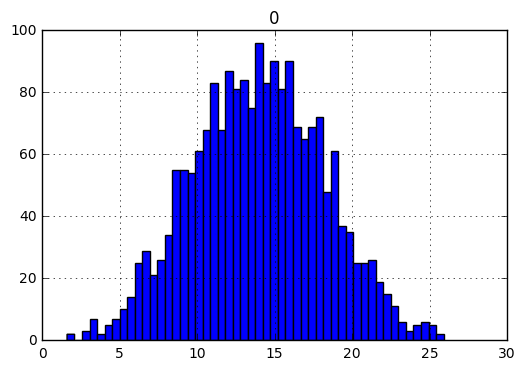

In [9]:
# virtulizing
%matplotlib inline
import pandas as pd
pd.DataFrame(weights_dic[40][2]).hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBDBD372E8>]], dtype=object)

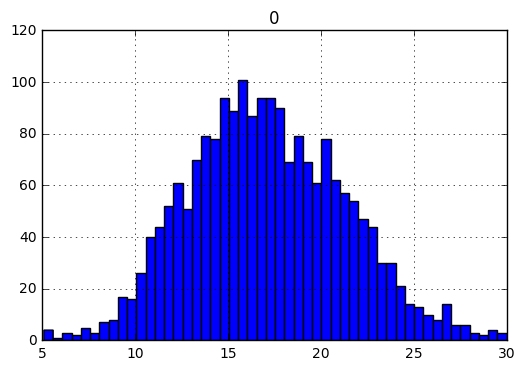

In [11]:
# virtulizing
%matplotlib inline
import pandas as pd
pd.DataFrame(weights_dic[80][2]).hist(bins=50)

In [12]:
del train_x
del train_y
del test_x
del text_y

NameError: name 'text_y' is not defined

In [8]:
pixel_avg = [np.average(i) for i in test_x]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213CFBBF630>]], dtype=object)

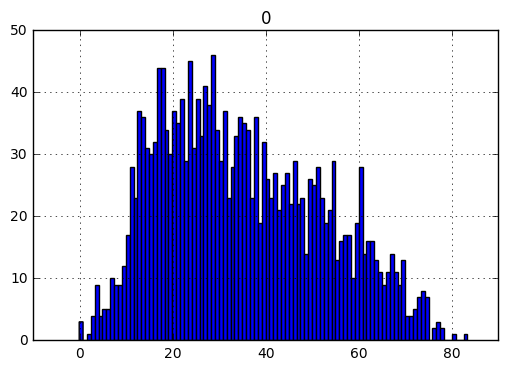

In [10]:
%matplotlib inline
import pandas as pd
pd.DataFrame(pixel_avg).hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F083BA28D0>]], dtype=object)

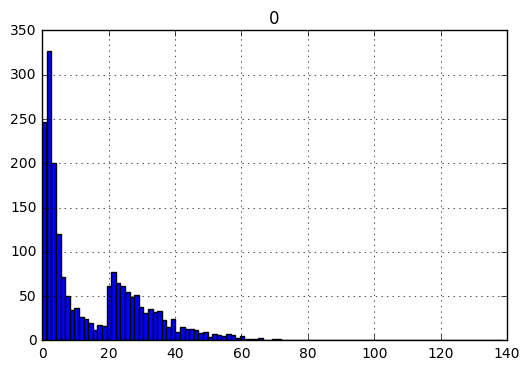

In [36]:
# virtulizing
%matplotlib inline
import pandas as pd
pd.DataFrame(test_y).hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0A56C5EF0>]], dtype=object)

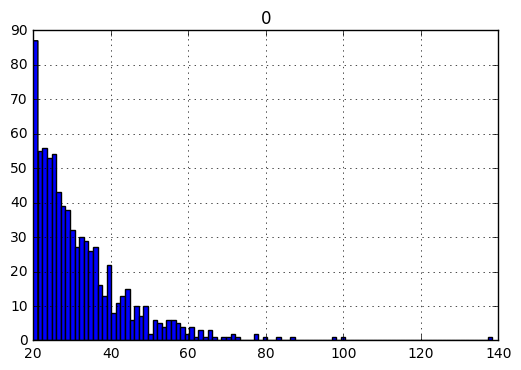

In [70]:
# virtulizing
%matplotlib inline
import pandas as pd
test_y = np.asarray(test_y)
pd.DataFrame(test_y[test_y >= 20]).hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0A59B9A58>]], dtype=object)

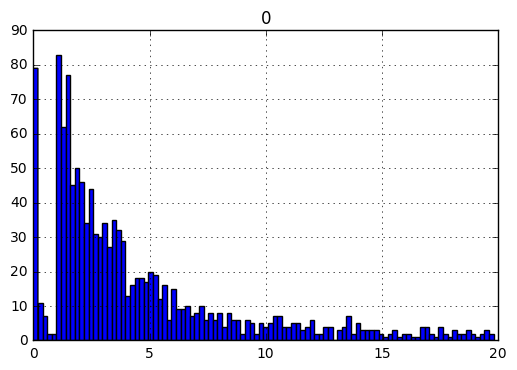

In [71]:
# virtulizing
%matplotlib inline
import pandas as pd
test_y = np.asarray(test_y)
pd.DataFrame(test_y[test_y < 20]).hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F07F9CED30>]], dtype=object)

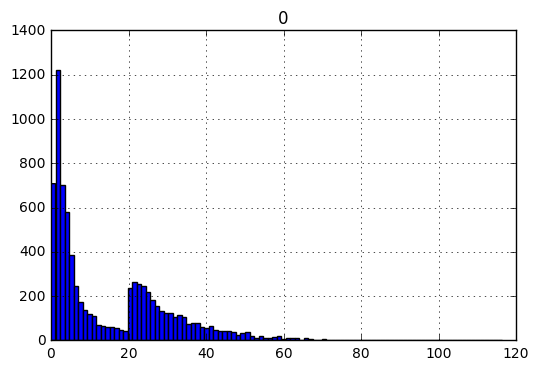

In [37]:
# virtulizing
%matplotlib inline
import pandas as pd
pd.DataFrame(train_y).hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0EF256240>]], dtype=object)

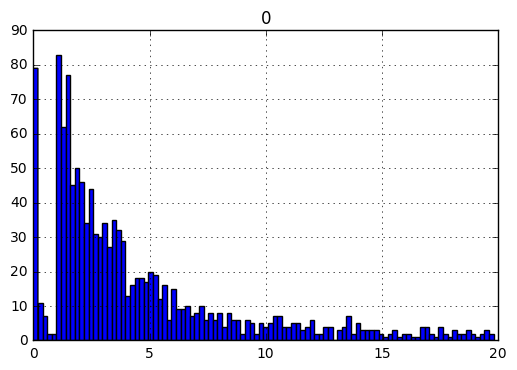

In [88]:
train_y = np.asarray(test_y)
pd.DataFrame(train_y[test_y < 20]).hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0B38F8C88>]], dtype=object)

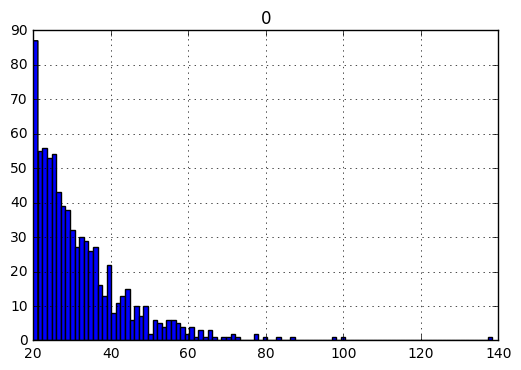

In [87]:
pd.DataFrame(test_y[test_y >= 20]).hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0B3861CF8>]], dtype=object)

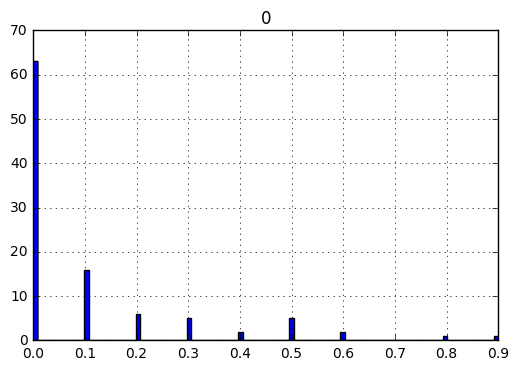

In [86]:
pd.DataFrame(test_y[test_y < 1]).hist(bins=100)

In [52]:
del predict_x

In [53]:
predict_x = []
count = 0
with open('CIKM2017_testA/testA.txt') as fhdl:
    for line in fhdl:
        count += 1
        if count % 50 == 0:
            print (float(count) / 10000,end=' '),
        linenum,label,datas = line.strip().split(',')
        label = float(label)
        datas = np.asarray(datas.split(" "),dtype=np.int)
        datas[datas < 0] = 0
        datas = np.asarray(datas,dtype=np.uint8)
        predict_x.append(datas)
        


0.005 0.01 0.015 0.02 0.025 0.03 0.035 0.04 0.045 0.05 0.055 0.06 0.065 0.07 0.075 0.08 0.085 0.09 0.095 0.1 0.105 0.11 0.115 0.12 0.125 0.13 0.135 0.14 0.145 0.15 0.155 0.16 0.165 0.17 0.175 0.18 0.185 0.19 0.195 0.2 

In [57]:
with open('onlinedata.plk','wb') as whdl:
    pickle.dump(predict_x,whdl)

In [14]:
with open('onlinedata.plk','rb') as fhdl:
    predict_x = pickle.load(fhdl)

In [15]:
predict_x[0][predict_x[0] > 128]

array([131, 131, 131, ..., 137, 131, 131], dtype=uint8)

In [16]:
predict_x = np.asarray(predict_x,dtype=np.uint8)

In [45]:
predict_x[predict_x < 0] = 0

In [70]:
predict_y = sess.run(y,feed_dict={X:np.asarray(predict_x,dtype=np.uint8)})

In [71]:
predict_y

array([[  7.89219189],
       [ 10.65508747],
       [ 12.67513371],
       ..., 
       [  5.09071112],
       [  2.88096619],
       [  3.77302599]], dtype=float32)

In [139]:
model_w,model_b,_,__ = weights_dic[1080]

In [140]:
mm = np.dot(np.asarray(predict_x),model_w) + model_b

In [141]:
mm[:,0]

array([ 17.93303108,  22.35477638,  15.16876221, ...,  16.50798798,
        11.05668354,  17.69533157], dtype=float32)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB87EDCF60>]], dtype=object)

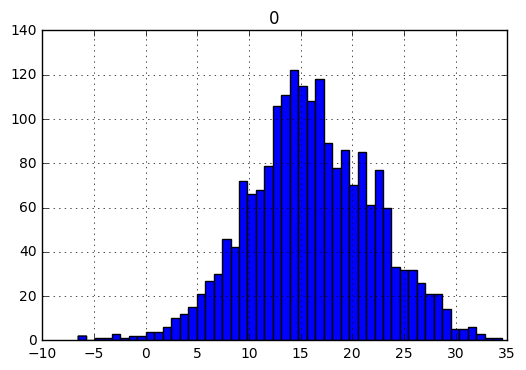

In [142]:
pd.DataFrame(mm).hist(bins=50)

In [143]:
result = mm
result[result < 0] = 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB87FE1EF0>]], dtype=object)

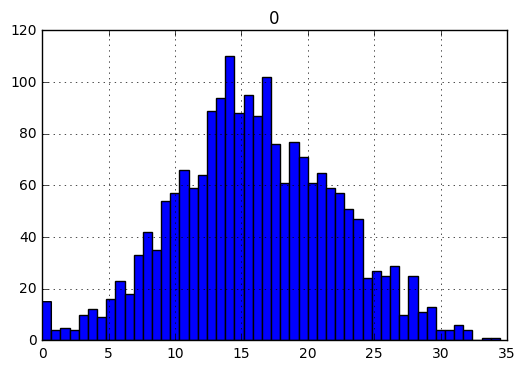

In [144]:
pd.DataFrame(result).hist(bins=50)

In [145]:
result[result<0]

array([], dtype=float32)

In [146]:
np.average(result)

16.079367

In [148]:
result

array([[ 17.93303108],
       [ 22.35477638],
       [ 15.16876221],
       ..., 
       [ 16.50798798],
       [ 11.05668354],
       [ 17.69533157]], dtype=float32)

In [149]:
# write result
with open('answers/answer_4_17_iter_1080.csv','w') as whdl:
    for value in result:
        whdl.write("%s\n" % (value[0]))